# Optimization with random initialization

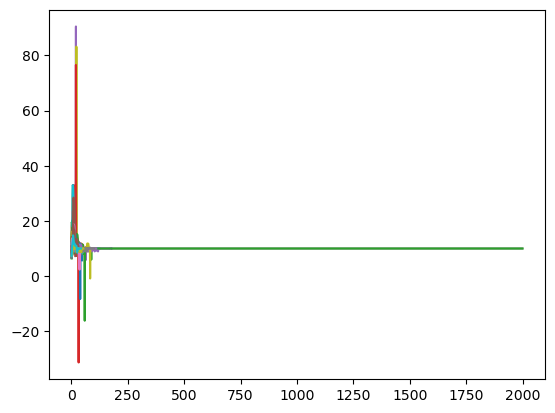

True
optimal design variable:
   capture_width       8.919 [m]
   pen_diameter       10.025 [m]
   pen_height          3.000 [m]
   spacing           278.666 [m]
   stock_density      30.000 [kg/m^3]
   pen_depth          13.029 [m]
   es_size           372.287 [kWh]
   num_pens           11.000 [-]
----------------------------------------
optimal objective function terms:
   cost_per_yield      9.983 [$/kg]
   price          663092.915 [$]
   fish_yield      66423.361 [kg]
----------------------------------------
optimal WEC rated power:
   P_rated         159.313 [kW]
----------------------------------------
optimal Port to deployment location distance:
   distance         284.652 [km]
----------------------------------------
optimal price break down:
   wec price            168716.419 [$]
   pen price            260483.770 [$]
   fish feed price      133003.013 [$]
   energy st price      100889.712 [$]
----------------------------------------
optimal constraints:
   P_gen_cons     

In [1]:
import modules
from modules import Aqua_Obj
import optimization
from utilities import *
import numpy as np
import importlib
importlib.reload(modules)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sim_wecpen import *

all_vars = ['x_wec','x_type_wec','x_pen', 'x_disc_pen', 'p_pen','x_env','p_wec','p_fish_salmon', 'x_es', 'p_es', 'pos_env', 'p_vessel']
# with wave real data
all_vars = all_vars  + ['p_wave_vec']
# with wave average data
#all_vars = all_vars  + ['x_wave_ave']

fig, ax = plt.subplots(1,1)
opt_res_history = []
cons_history = []
iteration_history = []

x_init, p_init, x, res_best, p_best, op_obj = wecpen_opt(all_vars)

iteration = np.linspace(1,max_iter+1,max_iter+1)
    
for n_test in range(100):
    #set random x0
    x0 = []
    for i0 in range(len(x.bnds)):
        x0.append(np.random.uniform(low=x.bnds[i0][0], high=x.bnds[i0][1]))

    #optimization
    x_init, p_init, x, res_best, p_best, op_obj = wecpen_opt(all_vars, x0)
    
    ax.plot(iteration, op_obj.f)
    
    opt_res_history.append(op_obj.f)
    iteration_history.append(op_obj.count)
    cons_history.append(op_obj.ineq)

#plt.ylim([0, 100])
plt.show()

optimize_result(x.name, x.list, x.unit, res_best, p_best)